# Accidentes Terrestres

In [ ]:
import pandas as pd
import fs

MAIN_DIR = fs.open_fs("../../data/raw/Accidentes Terrestres")
CSV_DIR = MAIN_DIR.getsyspath("atus_anual_2019.csv")

df_raw = pd.read_csv(CSV_DIR)
df_raw = df_raw.reset_index()
column_names = ['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA', 'ID_MINUTO',
                'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ',
                'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR',
                'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO',
                'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO',
                'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO',
                'NEMUERTO', 'NEHERIDO', 'CLASACC', 'ESTATUS', 'NA']

# Assign the new column names to the DataFrame
df_raw.columns = column_names
del df_raw['NA']
df_raw.head()

COBERTURA  ID_ENTIDAD  ID_MUNICIPIO  ANIO  MES  ID_HORA  ID_MINUTO  ID_DIA  \
0  Municipal           1             1  2019    1        1          5       1   
1  Municipal           1             1  2019    1        3         53       1   
2  Municipal           1             1  2019    1        5         35       1   
3  Municipal           1             1  2019    1        6         50       1   
4  Municipal           1             1  2019    1        8         50       1   

  DIASEMANA                     URBANA  ... PEATMUERTO PEATHERIDO  CICLMUERTO  \
0    Martes  Accidente en intersección  ...          0          0           0   
1    Martes  Accidente en intersección  ...          0          0           0   
2    Martes  Accidente en intersección  ...          0          0           0   
3    Martes  Accidente en intersección  ...          0          0           0   
4    Martes  Accidente en intersección  ...          0          0           0   

   CICLHERIDO  OTROMUERTO  OTROHERIDO  NEMUERTO  NEHERIDO     CLASACC  \
0           0           0           0         0         0    No fatal   
1           0           0           0         0         0    No fatal   
2           0           0           0         0         0  Sólo daños   
3           0           0           0         0         0  Sólo daños   
4           0           0           0         0         0  Sólo daños   

              ESTATUS  
0  Cifras Definitivas  
1  Cifras Definitivas  
2  Cifras Definitivas  
3  Cifras Definitivas  
4  Cifras Definitivas  

[5 rows x 45 columns]

In [ ]:
df_cdmx = df_raw[df_raw['ID_ENTIDAD'] == 9].copy()
df_cdmx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10673 entries, 75140 to 85812
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COBERTURA     10673 non-null  object
 1   ID_ENTIDAD    10673 non-null  int64 
 2   ID_MUNICIPIO  10673 non-null  int64 
 3   ANIO          10673 non-null  int64 
 4   MES           10673 non-null  int64 
 5   ID_HORA       10673 non-null  int64 
 6   ID_MINUTO     10673 non-null  int64 
 7   ID_DIA        10673 non-null  int64 
 8   DIASEMANA     10673 non-null  object
 9   URBANA        10673 non-null  object
 10  SUBURBANA     10673 non-null  object
 11  TIPACCID      10673 non-null  object
 12  AUTOMOVIL     10673 non-null  int64 
 13  CAMPASAJ      10673 non-null  int64 
 14  MICROBUS      10673 non-null  int64 
 15  PASCAMION     10673 non-null  int64 
 16  OMNIBUS       10673 non-null  int64 
 17  TRANVIA       10673 non-null  int64 
 18  CAMIONETA     10673 non-null  int64 
 19  CAMIO

In [ ]:
# Leyendo tags
MUN_CSV_DIR = MAIN_DIR.getsyspath("tc_municipio.csv")
df_tags = pd.read_csv(MUN_CSV_DIR)
df_tags = df_tags[df_tags['ID_ENTIDAD'] == 9]
df_tags.head()

ID_ENTIDAD  ID_MUNICIPIO          NOM_MUNICIPIO
281           9             1       Ciudad de México
282           9             2           Azcapotzalco
283           9             3               Coyoacán
284           9             4  Cuajimalpa de Morelos
285           9             5      Gustavo A. Madero

In [ ]:
df_combinado = pd.merge(df_cdmx, df_tags, on='ID_MUNICIPIO')
df_combinado

COBERTURA  ID_ENTIDAD_x  ID_MUNICIPIO  ANIO  MES  ID_HORA  ID_MINUTO  \
0      Municipal             9             2  2019    1       19         59   
1      Municipal             9             2  2019    1        3         37   
2      Municipal             9             2  2019    1       14         23   
3      Municipal             9             2  2019    1       15         55   
4      Municipal             9             2  2019    1       14         30   
...          ...           ...           ...   ...  ...      ...        ...   
10668  Municipal             9            17  2019   12       12         15   
10669  Municipal             9            17  2019   12        0         55   
10670  Municipal             9            17  2019   12       10         30   
10671  Municipal             9            17  2019   12       23         20   
10672  Municipal             9            17  2019   12       16         30   

       ID_DIA  DIASEMANA                     URBANA  ... CICLMUERTO  \
0           1     Martes  Accidente en intersección  ...          0   
1           5     Sabado  Accidente en intersección  ...          0   
2           5     Sabado  Accidente en intersección  ...          0   
3           5     Sabado  Accidente en intersección  ...          0   
4           9  Miercoles  Accidente en intersección  ...          0   
...       ...        ...                        ...  ...        ...   
10668      29    Domingo  Accidente en intersección  ...          0   
10669      30      lunes  Accidente en intersección  ...          0   
10670      30      lunes  Accidente en intersección  ...          0   
10671      30      lunes  Accidente en intersección  ...          0   
10672      31     Martes  Accidente en intersección  ...          0   

      CICLHERIDO  OTROMUERTO  OTROHERIDO  NEMUERTO  NEHERIDO     CLASACC  \
0              0           0           0         0         0    No fatal   
1              0           0           0         0         0  Sólo daños   
2              0           0           0         0         0  Sólo daños   
3              0           0           0         0         0    No fatal   
4              0           0           0         0         0  Sólo daños   
...          ...         ...         ...       ...       ...         ...   
10668          0           0           0         0         0  Sólo daños   
10669          0           0           0         0         0  Sólo daños   
10670          0           0           0         0         0  Sólo daños   
10671          0           0           0         0         0  Sólo daños   
10672          0           0           0         0         0    No fatal   

                  ESTATUS  ID_ENTIDAD_y        NOM_MUNICIPIO  
0      Cifras Definitivas             9         Azcapotzalco  
1      Cifras Definitivas             9         Azcapotzalco  
2      Cifras Definitivas             9         Azcapotzalco  
3      Cifras Definitivas             9         Azcapotzalco  
4      Cifras Definitivas             9         Azcapotzalco  
...                   ...           ...                  ...  
10668  Cifras Definitivas             9  Venustiano Carranza  
10669  Cifras Definitivas             9  Venustiano Carranza  
10670  Cifras Definitivas             9  Venustiano Carranza  
10671  Cifras Definitivas             9  Venustiano Carranza  
10672  Cifras Definitivas             9  Venustiano Carranza  

[10673 rows x 47 columns]

In [ ]:
desired_columns = ['MES', 'ID_HORA', 'ID_DIA', 'DIASEMANA', 'URBANA', 'TIPACCID', 'BICICLETA', 'CLASACC',
'CAUSAACCI', 'SEXO', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'NOM_MUNICIPIO']
df = df_combinado[desired_columns].copy()
df.head()

MES  ID_HORA  ID_DIA  DIASEMANA                     URBANA  \
0    1       19       1     Martes  Accidente en intersección   
1    1        3       5     Sabado  Accidente en intersección   
2    1       14       5     Sabado  Accidente en intersección   
3    1       15       5     Sabado  Accidente en intersección   
4    1       14       9  Miercoles  Accidente en intersección   

                          TIPACCID  BICICLETA     CLASACC  CAUSAACCI     SEXO  \
0         Colisión con motocicleta          0    No fatal  Conductor   Hombre   
1  Colisión con vehículo automotor          0  Sólo daños  Conductor  Se fugó   
2  Colisión con vehículo automotor          0  Sólo daños  Conductor  Se fugó   
3         Colisión con objeto fijo          0    No fatal  Conductor   Hombre   
4  Colisión con vehículo automotor          0  Sólo daños  Conductor   Hombre   

   ID_EDAD  CONDMUERTO  CONDHERIDO NOM_MUNICIPIO  
0       25           0           2  Azcapotzalco  
1        0           0           0  Azcapotzalco  
2        0           0           0  Azcapotzalco  
3       40           0           1  Azcapotzalco  
4       49           0           0  Azcapotzalco

In [ ]:
df_meses = df['MES'].value_counts().reset_index()
df_meses.columns = ['mes', 'count']
df_meses = df_meses.sort_values(by='mes')
meses_dict = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}
df_meses['mes'] = df_meses['mes'].replace(meses_dict)
df_meses


mes  count
9        enero    807
8      febrero    850
4        marzo    919
10       abril    784
7         mayo    872
11       junio    773
6        julio    891
2       agosto    943
1   septiembre    953
0      octubre   1027
3    noviembre    939
5    diciembre    915

In [ ]:
DeepnoteChart(df_meses, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":"Meses"},"sort":null,"type":"nominal","field":"mes","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de accidentes"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"oranges"},"aggregate":"sum"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"title":"Meses"},"sort":null,"type":"nominal","field":"mes","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de accidentes"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"count","aggregate":"sum"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"oranges"},"aggregate":"sum"}}}]}],"title":"Accidentes terrestres CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df_hour = df['ID_HORA'].value_counts().reset_index()
df_hour.columns = ['hour', 'count']
df_hour = df_hour.sort_values(by='hour')
df_hour

hour  count
18     0    305
19     1    279
23     2    246
20     3    257
22     4    248
21     5    256
17     6    351
7      7    514
0      8    657
3      9    540
1     10    601
12    11    491
2     12    574
13    13    486
5     14    526
4     15    533
6     16    516
15    17    446
10    18    504
8     19    505
11    20    499
9     21    505
14    22    448
16    23    386

In [ ]:
DeepnoteChart(df_hour, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"hour","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"title":"Cantidad de accidentes"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"goldred"},"aggregate":"sum"}}}]}],"title":"Accidentes en diferentes horarios CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df

MES  ID_HORA  ID_DIA  DIASEMANA                     URBANA  \
0        1       19       1     Martes  Accidente en intersección   
1        1        3       5     Sabado  Accidente en intersección   
2        1       14       5     Sabado  Accidente en intersección   
3        1       15       5     Sabado  Accidente en intersección   
4        1       14       9  Miercoles  Accidente en intersección   
...    ...      ...     ...        ...                        ...   
10668   12       12      29    Domingo  Accidente en intersección   
10669   12        0      30      lunes  Accidente en intersección   
10670   12       10      30      lunes  Accidente en intersección   
10671   12       23      30      lunes  Accidente en intersección   
10672   12       16      31     Martes  Accidente en intersección   

                                    TIPACCID  BICICLETA     CLASACC  \
0                   Colisión con motocicleta          0    No fatal   
1            Colisión con vehículo automotor          0  Sólo daños   
2            Colisión con vehículo automotor          0  Sólo daños   
3                   Colisión con objeto fijo          0    No fatal   
4            Colisión con vehículo automotor          0  Sólo daños   
...                                      ...        ...         ...   
10668        Colisión con vehículo automotor          0  Sólo daños   
10669        Colisión con vehículo automotor          0  Sólo daños   
10670        Colisión con vehículo automotor          0  Sólo daños   
10671        Colisión con vehículo automotor          0  Sólo daños   
10672  Colisión con peatón (atropellamiento)          0    No fatal   

       CAUSAACCI     SEXO  ID_EDAD  CONDMUERTO  CONDHERIDO  \
0      Conductor   Hombre       25           0           2   
1      Conductor  Se fugó        0           0           0   
2      Conductor  Se fugó        0           0           0   
3      Conductor   Hombre       40           0           1   
4      Conductor   Hombre       49           0           0   
...          ...      ...      ...         ...         ...   
10668  Conductor   Hombre       59           0           0   
10669  Conductor   Hombre       37           0           0   
10670  Conductor    Mujer       54           0           0   
10671  Conductor   Hombre       36           0           0   
10672  Conductor   Hombre       25           0           0   

             NOM_MUNICIPIO  
0             Azcapotzalco  
1             Azcapotzalco  
2             Azcapotzalco  
3             Azcapotzalco  
4             Azcapotzalco  
...                    ...  
10668  Venustiano Carranza  
10669  Venustiano Carranza  
10670  Venustiano Carranza  
10671  Venustiano Carranza  
10672  Venustiano Carranza  

[10673 rows x 14 columns]

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#8018D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"title":"Edades"},"sort":null,"type":"quantitative","field":"ID_EDAD"},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"Distribución de edades","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]}}}""")

In [ ]:
df

MES  ID_HORA  ID_DIA  DIASEMANA                     URBANA  \
0        1       19       1     Martes  Accidente en intersección   
1        1        3       5     Sabado  Accidente en intersección   
2        1       14       5     Sabado  Accidente en intersección   
3        1       15       5     Sabado  Accidente en intersección   
4        1       14       9  Miercoles  Accidente en intersección   
...    ...      ...     ...        ...                        ...   
10668   12       12      29    Domingo  Accidente en intersección   
10669   12        0      30      lunes  Accidente en intersección   
10670   12       10      30      lunes  Accidente en intersección   
10671   12       23      30      lunes  Accidente en intersección   
10672   12       16      31     Martes  Accidente en intersección   

                                    TIPACCID  BICICLETA     CLASACC  \
0                   Colisión con motocicleta          0    No fatal   
1            Colisión con vehículo automotor          0  Sólo daños   
2            Colisión con vehículo automotor          0  Sólo daños   
3                   Colisión con objeto fijo          0    No fatal   
4            Colisión con vehículo automotor          0  Sólo daños   
...                                      ...        ...         ...   
10668        Colisión con vehículo automotor          0  Sólo daños   
10669        Colisión con vehículo automotor          0  Sólo daños   
10670        Colisión con vehículo automotor          0  Sólo daños   
10671        Colisión con vehículo automotor          0  Sólo daños   
10672  Colisión con peatón (atropellamiento)          0    No fatal   

       CAUSAACCI     SEXO  ID_EDAD  CONDMUERTO  CONDHERIDO  \
0      Conductor   Hombre       25           0           2   
1      Conductor  Se fugó        0           0           0   
2      Conductor  Se fugó        0           0           0   
3      Conductor   Hombre       40           0           1   
4      Conductor   Hombre       49           0           0   
...          ...      ...      ...         ...         ...   
10668  Conductor   Hombre       59           0           0   
10669  Conductor   Hombre       37           0           0   
10670  Conductor    Mujer       54           0           0   
10671  Conductor   Hombre       36           0           0   
10672  Conductor   Hombre       25           0           0   

             NOM_MUNICIPIO  
0             Azcapotzalco  
1             Azcapotzalco  
2             Azcapotzalco  
3             Azcapotzalco  
4             Azcapotzalco  
...                    ...  
10668  Venustiano Carranza  
10669  Venustiano Carranza  
10670  Venustiano Carranza  
10671  Venustiano Carranza  
10672  Venustiano Carranza  

[10673 rows x 14 columns]

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"min(width, height) / 3"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","format":".2%"}]},"transform":[{"groupby":["CLASACC"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_CLASACC","op":"count","field":"CLASACC"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_CLASACC","op":"sum","field":"deepnote_percentage_aggregate_count_field_CLASACC"}]},{"as":"Percentage of CLASACC","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_CLASACC\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_CLASACC\\\\']"}]},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 + 30"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","format":".2%"},"color":{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","format":".2%"}]},"transform":[{"groupby":["CLASACC"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_CLASACC","op":"count","field":"CLASACC"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_CLASACC","op":"sum","field":"deepnote_percentage_aggregate_count_field_CLASACC"}]},{"as":"Percentage of CLASACC","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_CLASACC\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_CLASACC\\\\']"}]}]}],"title":"Calses de accidentes terrestres en CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"min(width, height) / 5"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","format":".2%"}]},"transform":[{"groupby":["TIPACCID"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_TIPACCID","op":"count","field":"TIPACCID"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_TIPACCID","op":"sum","field":"deepnote_percentage_aggregate_count_field_TIPACCID"}]},{"as":"Percentage of TIPACCID","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_TIPACCID\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_TIPACCID\\\\']"}]},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 + 30"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","format":".2%"},"color":{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":2},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","format":".2%"}]},"transform":[{"groupby":["TIPACCID"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_TIPACCID","op":"count","field":"TIPACCID"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_TIPACCID","op":"sum","field":"deepnote_percentage_aggregate_count_field_TIPACCID"}]},{"as":"Percentage of TIPACCID","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_TIPACCID\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_TIPACCID\\\\']"}]}]}],"title":"Calses de accidentes terrestres en CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
tipos_accidente = df['TIPACCID'].value_counts().reset_index().copy()
tipos_accidente

TIPACCID  count
0        Colisión con vehículo automotor   6642
1               Colisión con objeto fijo   1928
2               Colisión con motocicleta    924
3  Colisión con peatón (atropellamiento)    908
4                  Colisión con ciclista    142
5                      Caída de pasajero     47
6                                   Otro     40
7                              Volcadura     34
8                      Salida del camino      5
9                               Incendio      3

In [ ]:
tipos_accidente = df['TIPACCID'].replace(['Volcadura', 'Salida del camino', 'Incendio', 'Caída de pasajero'], 'Otro').copy()
nuevo_df = pd.DataFrame(tipos_accidente, columns=['TIPACCID'])
nuevo_df

TIPACCID
0                   Colisión con motocicleta
1            Colisión con vehículo automotor
2            Colisión con vehículo automotor
3                   Colisión con objeto fijo
4            Colisión con vehículo automotor
...                                      ...
10668        Colisión con vehículo automotor
10669        Colisión con vehículo automotor
10670        Colisión con vehículo automotor
10671        Colisión con vehículo automotor
10672  Colisión con peatón (atropellamiento)

[10673 rows x 1 columns]

In [ ]:
DeepnoteChart(nuevo_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"min(width, height) / 5"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","format":".0%"}]},"transform":[{"groupby":["TIPACCID"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_TIPACCID","op":"count","field":"TIPACCID"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_TIPACCID","op":"sum","field":"deepnote_percentage_aggregate_count_field_TIPACCID"}]},{"as":"Percentage of TIPACCID","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_TIPACCID\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_TIPACCID\\\\']"}]},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 + 30"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","format":".0%"},"color":{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"TIPACCID","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of TIPACCID","format":".0%"}]},"transform":[{"groupby":["TIPACCID"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_TIPACCID","op":"count","field":"TIPACCID"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_TIPACCID","op":"sum","field":"deepnote_percentage_aggregate_count_field_TIPACCID"}]},{"as":"Percentage of TIPACCID","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_TIPACCID\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_TIPACCID\\\\']"}]}]}],"title":"Tipos de accidentes terrestres CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
# tipos_accidente = df['TIPACCID'].replace('Volcadura','Otro').copy()
tipos_accidente = df['TIPACCID'].replace(['Volcadura', 'Salida del camino', 'Incendio', 'Caída de pasajero'], 'Otro').copy()
tipos_accidente_pie = tipos_accidente.value_counts().reset_index()
tipos_accidente_pie

TIPACCID  count
0        Colisión con vehículo automotor   6642
1               Colisión con objeto fijo   1928
2               Colisión con motocicleta    924
3  Colisión con peatón (atropellamiento)    908
4                  Colisión con ciclista    142
5                                   Otro    129

In [ ]:
df_cicl = df[df['BICICLETA'] == 1]
df_cicl

MES  ID_HORA  ID_DIA  DIASEMANA                        URBANA  \
29       1       14      28      lunes     Accidente en intersección   
133      4       21       8      lunes     Accidente en intersección   
138      4       22      10  Miercoles     Accidente en intersección   
358     10       12       4    Viernes     Accidente en intersección   
371     10       13      16  Miercoles     Accidente en intersección   
...    ...      ...     ...        ...                           ...   
10395    8        7      27     Martes     Accidente en intersección   
10416    9       11       4  Miercoles     Accidente en intersección   
10427    9       13      10     Martes     Accidente en intersección   
10494   10       21      11    Viernes  Accidente en no intersección   
10589   11       13      22    Viernes     Accidente en intersección   

                    TIPACCID  BICICLETA     CLASACC  CAUSAACCI     SEXO  \
29     Colisión con ciclista          1  Sólo daños  Conductor   Hombre   
133    Colisión con ciclista          1    No fatal  Conductor  Se fugó   
138    Colisión con ciclista          1    No fatal  Conductor   Hombre   
358    Colisión con ciclista          1    No fatal  Conductor  Se fugó   
371    Colisión con ciclista          1    No fatal  Conductor   Hombre   
...                      ...        ...         ...        ...      ...   
10395  Colisión con ciclista          1  Sólo daños  Conductor   Hombre   
10416  Colisión con ciclista          1    No fatal  Conductor    Mujer   
10427  Colisión con ciclista          1    No fatal  Conductor   Hombre   
10494  Colisión con ciclista          1  Sólo daños  Conductor   Hombre   
10589  Colisión con ciclista          1    No fatal  Conductor   Hombre   

       ID_EDAD  CONDMUERTO  CONDHERIDO        NOM_MUNICIPIO  
29          28           0           0         Azcapotzalco  
133          0           0           0         Azcapotzalco  
138         27           0           0         Azcapotzalco  
358          0           0           0         Azcapotzalco  
371         32           0           0         Azcapotzalco  
...        ...         ...         ...                  ...  
10395       46           0           0  Venustiano Carranza  
10416       58           0           0  Venustiano Carranza  
10427       35           0           0  Venustiano Carranza  
10494       31           0           0  Venustiano Carranza  
10589       31           0           0  Venustiano Carranza  

[153 rows x 14 columns]

In [ ]:
df_hour_cicl = df['ID_HORA'].value_counts().reset_index()
df_hour_cicl.columns = ['hour', 'count']
df_hour_cicl = df_hour_cicl.sort_values(by='hour')
df_hour_cicl

hour  count
18     0    305
19     1    279
23     2    246
20     3    257
22     4    248
21     5    256
17     6    351
7      7    514
0      8    657
3      9    540
1     10    601
12    11    491
2     12    574
13    13    486
5     14    526
4     15    533
6     16    516
15    17    446
10    18    504
8     19    505
11    20    499
9     21    505
14    22    448
16    23    386

In [ ]:
DeepnoteChart(df_hour_cicl, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":"Horas"},"sort":null,"type":"quantitative","field":"hour","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"title":"Cantidad de accidentes"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"oranges"},"aggregate":"sum"}}}]}],"title":"Horario de accidentes ciclistas CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
DeepnoteChart(df_cicl, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"min(width, height) / 5"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","format":".0%"}]},"transform":[{"groupby":["CLASACC"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_CLASACC","op":"count","field":"CLASACC"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_CLASACC","op":"sum","field":"deepnote_percentage_aggregate_count_field_CLASACC"}]},{"as":"Percentage of CLASACC","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_CLASACC\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_CLASACC\\\\']"}]},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 + 30"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","format":".0%"},"color":{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},"order":{"sort":"descending","type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"theta":{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"tooltip":[{"sort":null,"type":"nominal","field":"CLASACC","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"Percentage of CLASACC","format":".0%"}]},"transform":[{"groupby":["CLASACC"],"aggregate":[{"as":"deepnote_percentage_aggregate_count_field_CLASACC","op":"count","field":"CLASACC"}]},{"groupby":[],"joinaggregate":[{"as":"deepnote_percentage_custom_field_percentage_total_CLASACC","op":"sum","field":"deepnote_percentage_aggregate_count_field_CLASACC"}]},{"as":"Percentage of CLASACC","calculate":"datum[\\\\'deepnote_percentage_aggregate_count_field_CLASACC\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total_CLASACC\\\\']"}]}]}],"title":"Categoría de accidentes ciclistas CDMX 2019","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
import geopandas as gpd
states = gpd.read_file('/work/Accidentes Terrestres/atus_anual_2019.csv')
states

COBERTURA ID_ENTIDAD ID_MUNICIPIO  ANIO MES ID_HORA ID_MINUTO ID_DIA  \
0       Municipal         01          001  2019  01      01        05     01   
1       Municipal         01          001  2019  01      03        53     01   
2       Municipal         01          001  2019  01      05        35     01   
3       Municipal         01          001  2019  01      06        50     01   
4       Municipal         01          001  2019  01      08        50     01   
...           ...        ...          ...   ...  ..     ...       ...    ...   
378809  Municipal         32          056  2019  12      09        37     27   
378810  Municipal         32          056  2019  12      02        20     29   
378811  Municipal         32          056  2019  12      18        40     30   
378812  Municipal         32          056  2019  12      15        45     31   
378813  Municipal         32          056  2019  12      23        22     31   

       DIASEMANA                     URBANA  ... PEATHERIDO CICLMUERTO  \
0         Martes  Accidente en intersección  ...          0          0   
1         Martes  Accidente en intersección  ...          0          0   
2         Martes  Accidente en intersección  ...          0          0   
3         Martes  Accidente en intersección  ...          0          0   
4         Martes  Accidente en intersección  ...          0          0   
...          ...                        ...  ...        ...        ...   
378809   Viernes  Accidente en intersección  ...          0          0   
378810   Domingo  Accidente en intersección  ...          0          0   
378811     lunes  Accidente en intersección  ...          0          0   
378812    Martes  Accidente en intersección  ...          0          0   
378813    Martes  Accidente en intersección  ...          0          0   

       CICLHERIDO OTROMUERTO OTROHERIDO NEMUERTO NEHERIDO     CLASACC  \
0               0          0          0        0        0    No fatal   
1               0          0          0        0        0    No fatal   
2               0          0          0        0        0  Sólo daños   
3               0          0          0        0        0  Sólo daños   
4               0          0          0        0        0  Sólo daños   
...           ...        ...        ...      ...      ...         ...   
378809          0          0          0        0        0  Sólo daños   
378810          0          0          0        0        0  Sólo daños   
378811          0          0          0        0        0    No fatal   
378812          0          0          0        0        0  Sólo daños   
378813          0          0          0        0        0    No fatal   

                   ESTATUS geometry  
0       Cifras Definitivas     None  
1       Cifras Definitivas     None  
2       Cifras Definitivas     None  
3       Cifras Definitivas     None  
4       Cifras Definitivas     None  
...                    ...      ...  
378809  Cifras Definitivas     None  
378810  Cifras Definitivas     None  
378811  Cifras Definitivas     None  
378812  Cifras Definitivas     None  
378813  Cifras Definitivas     None  

[378814 rows x 46 columns]

In [ ]:
df_cdmx_tags=gpd.read_file("alcaldias.geojson")
df_cdmx_tags=df_cdmx_tags[['nomgeo','geometry']]
df_cdmx_tags

nomgeo                                           geometry
0               Milpa Alta  POLYGON ((-98.99723 19.22731, -98.99745 19.227...
1            Benito Juárez  POLYGON ((-99.13679 19.40156, -99.13682 19.401...
2        Gustavo A. Madero  POLYGON ((-99.11860 19.58446, -99.11691 19.581...
3             Azcapotzalco  POLYGON ((-99.18231 19.50748, -99.18229 19.507...
4                Iztacalco  POLYGON ((-99.05584 19.42196, -99.05589 19.421...
5           Álvaro Obregón  POLYGON ((-99.18871 19.39475, -99.18868 19.394...
6               Xochimilco  POLYGON ((-99.09870 19.31964, -99.09849 19.319...
7      Venustiano Carranza  POLYGON ((-99.10895 19.45273, -99.10889 19.452...
8                  Tlalpan  POLYGON ((-99.19629 19.30228, -99.19595 19.302...
9    Cuajimalpa de Morelos  POLYGON ((-99.25698 19.40043, -99.25694 19.400...
10              Cuauhtémoc  POLYGON ((-99.12919 19.46247, -99.12884 19.462...
11              Iztapalapa  POLYGON ((-99.05813 19.40072, -99.05814 19.400...
12                Coyoacán  POLYGON ((-99.13923 19.35687, -99.13772 19.356...
13          Miguel Hidalgo  POLYGON ((-99.19058 19.46794, -99.19066 19.465...
14  La Magdalena Contreras  POLYGON ((-99.20859 19.33610, -99.20867 19.335...
15                 Tláhuac  POLYGON ((-98.97893 19.32393, -98.97856 19.323...

In [ ]:
desired_columns = ['NOM_MUNICIPIO']
df_mun = df_combinado[desired_columns].copy()
df_num = df_mun.value_counts().reset_index()
column_names = ['nomgeo', 'count']
df_num.columns = column_names
df_num

nomgeo  count
0               Cuauhtémoc   1524
1        Gustavo A. Madero   1407
2               Iztapalapa   1207
3           Miguel Hidalgo    979
4            Benito Juárez    837
5           Álvaro Obregón    786
6                 Coyoacán    736
7                  Tlalpan    730
8      Venustiano Carranza    676
9             Azcapotzalco    492
10               Iztacalco    421
11   Cuajimalpa de Morelos    286
12              Xochimilco    220
13                 Tláhuac    152
14  La Magdalena Contreras    125
15              Milpa Alta     95

In [ ]:
df_map = pd.merge(df_cdmx_tags, df_num, on='nomgeo')
df_map

nomgeo                                           geometry  \
0               Milpa Alta  POLYGON ((-98.99723 19.22731, -98.99745 19.227...   
1            Benito Juárez  POLYGON ((-99.13679 19.40156, -99.13682 19.401...   
2        Gustavo A. Madero  POLYGON ((-99.11860 19.58446, -99.11691 19.581...   
3             Azcapotzalco  POLYGON ((-99.18231 19.50748, -99.18229 19.507...   
4                Iztacalco  POLYGON ((-99.05584 19.42196, -99.05589 19.421...   
5           Álvaro Obregón  POLYGON ((-99.18871 19.39475, -99.18868 19.394...   
6               Xochimilco  POLYGON ((-99.09870 19.31964, -99.09849 19.319...   
7      Venustiano Carranza  POLYGON ((-99.10895 19.45273, -99.10889 19.452...   
8                  Tlalpan  POLYGON ((-99.19629 19.30228, -99.19595 19.302...   
9    Cuajimalpa de Morelos  POLYGON ((-99.25698 19.40043, -99.25694 19.400...   
10              Cuauhtémoc  POLYGON ((-99.12919 19.46247, -99.12884 19.462...   
11              Iztapalapa  POLYGON ((-99.05813 19.40072, -99.05814 19.400...   
12                Coyoacán  POLYGON ((-99.13923 19.35687, -99.13772 19.356...   
13          Miguel Hidalgo  POLYGON ((-99.19058 19.46794, -99.19066 19.465...   
14  La Magdalena Contreras  POLYGON ((-99.20859 19.33610, -99.20867 19.335...   
15                 Tláhuac  POLYGON ((-98.97893 19.32393, -98.97856 19.323...   

    count  
0      95  
1     837  
2    1407  
3     492  
4     421  
5     786  
6     220  
7     676  
8     730  
9     286  
10   1524  
11   1207  
12    736  
13    979  
14    125  
15    152

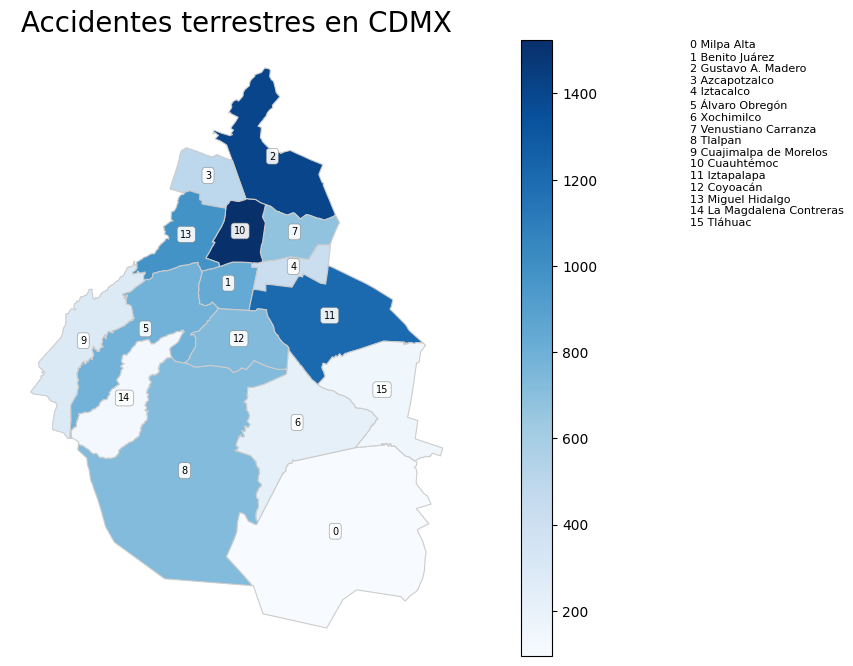

In [ ]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(15, 8))
df_map.plot(column="count", cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.axis("off")

titulo = str("Accidentes terrestres en CDMX")
ax.set_title(titulo, fontdict={"fontsize": "20", "fontweight": "3"})

legend = ''

# Add annotation for every waterschap with a deelstroomgebied
bbox_props = dict(boxstyle="round", fc="w", ec="gray", alpha=0.9,lw=0.4)
for idx, row in df_map.iterrows():    
    string = str(idx)
    x, y = row.geometry.centroid.coords[0]
    ax.annotate(string, xy=(x, y), color='black',
                    horizontalalignment='center', bbox=bbox_props, fontsize=7)
    legend = legend + f"{idx} {row['nomgeo']}\n"

ax.text(1.5, 1, legend,
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax.transAxes,
    fontsize=8)

fig.savefig(titulo + ".png", dpi=300)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25df4652-e935-424f-95eb-02091fa21a09' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>